In [1]:
from yunchieh_plotlib.Plot_function import plot_umap
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

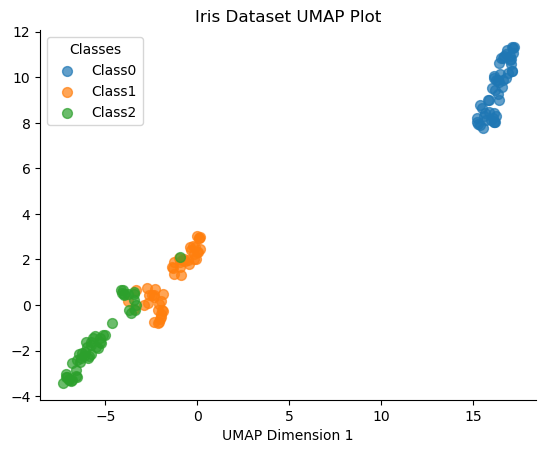

In [2]:
#function example
iris = load_iris()
X = iris.data
y= iris.target


fig, ax = plt.subplots()
plot_umap(
    X, 
    y, 
    ax, 
    s=50, 
    set_title={'label': 'Iris Dataset UMAP Plot'}, 
    set_xlabel='UMAP Dimension 1',
    set_ylabel= 'UMAP Dimension 2' 
    )
plt.show()